In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import ast

In [3]:
sales=pd.read_csv("vgsales.csv")

In [4]:
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
sales["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [8]:
sales["Year"].fillna(sales["Year"].mean(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6416\4075935575.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales["Year"].fillna(sales["Year"].mean(),inplace=True)


In [9]:
sales["Year"].unique()

array([2006.        , 1985.        , 2008.        , 2009.        ,
       1996.        , 1989.        , 1984.        , 2005.        ,
       1999.        , 2007.        , 2010.        , 2013.        ,
       2004.        , 1990.        , 1988.        , 2002.        ,
       2001.        , 2011.        , 1998.        , 2015.        ,
       2012.        , 2014.        , 1992.        , 1997.        ,
       1993.        , 1994.        , 1982.        , 2003.        ,
       1986.        , 2000.        , 2006.40644331, 1995.        ,
       2016.        , 1991.        , 1981.        , 1987.        ,
       1980.        , 1983.        , 2020.        , 2017.        ])

In [10]:
sales["Year"]=sales["Year"].apply(lambda x: int(x))

In [11]:
sales["Year"].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017], dtype=int64)

In [12]:
sales["Publisher"]=sales["Publisher"].fillna(sales["Publisher"].mode()[0])

In [13]:
sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
sales[sales.duplicated()].sum()

Rank              0
Name              0
Platform          0
Year              0
Genre             0
Publisher         0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: object

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [16]:
# Question 1
cols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
top_region_sales=[]
for i in cols:
    top_region_sales.append(sales[i].sum())

In [17]:
top_region_sales

[4392.950000000001, 2434.1299999999997, 1291.0200000000002, 797.7500000000001]

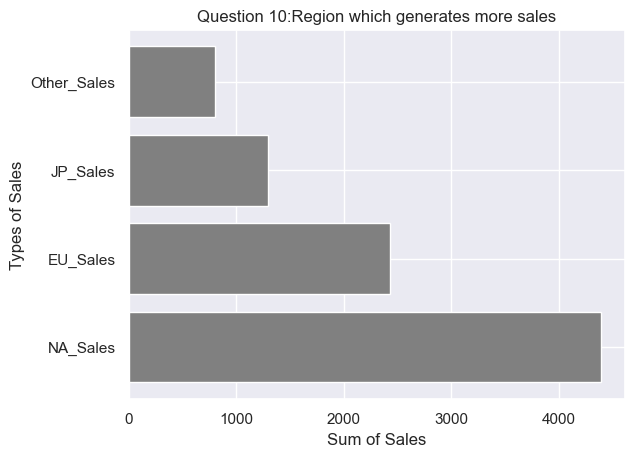

In [18]:
sns.set_theme(style="darkgrid")
plt.barh(cols,top_region_sales,color="grey")
plt.xlabel("Sum of Sales")
plt.ylabel("Types of Sales")
plt.title("Question 10:Region which generates more sales")
plt.show()


In [19]:
platform=sales.groupby("Platform").size().sort_values(ascending=False).reset_index()

In [20]:
platform.columns

Index(['Platform', 0], dtype='object')

In [21]:
platform["Count"]=platform[0]
platform

,Platform,0,Count
0,DS,2163,2163
1,PS2,2161,2161
2,PS3,1329,1329
3,Wii,1325,1325
4,X360,1265,1265
5,PSP,1213,1213
6,PS,1196,1196
7,PC,960,960
8,XB,824,824
9,GBA,822,822


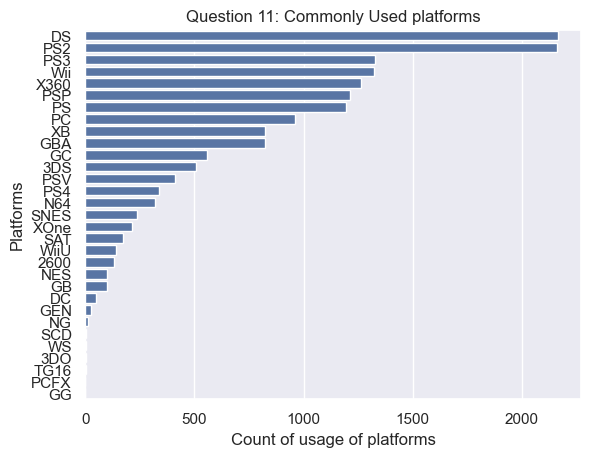

In [22]:
sns.set_theme(style="darkgrid")
sns.barplot(data=platform,x=0,y="Platform")
plt.xlabel("Count of usage of platforms")
plt.ylabel("Platforms")
plt.title("Question 11: Commonly Used platforms")
plt.tight_layout
plt.show()



In [23]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [52]:
releases_per_year = sales.groupby("Year")["Name"].count().reset_index()
releases_per_year.columns = ["Year", "Name"]

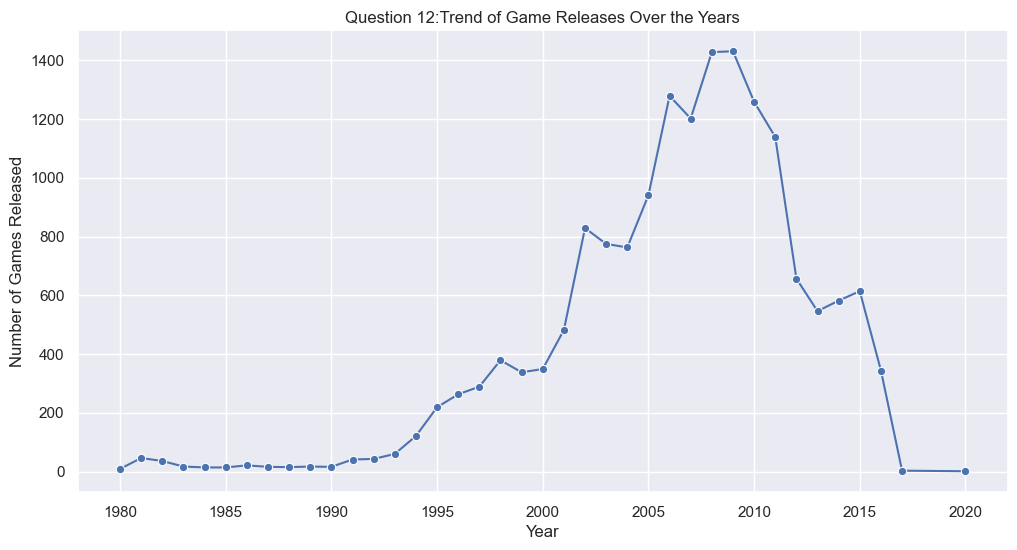

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=releases_per_year, x="Year", y="Name", marker="o")
plt.title("Question 12:Trend of Game Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.show()

In [24]:
publishers=sales.groupby("Publisher")[["Global_Sales"]].sum().sort_values("Global_Sales",ascending=False).head(20)

In [25]:
publishers


,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1125.20
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


Text(0.5, 1.0, 'Question 13:Publishers who had High sales')

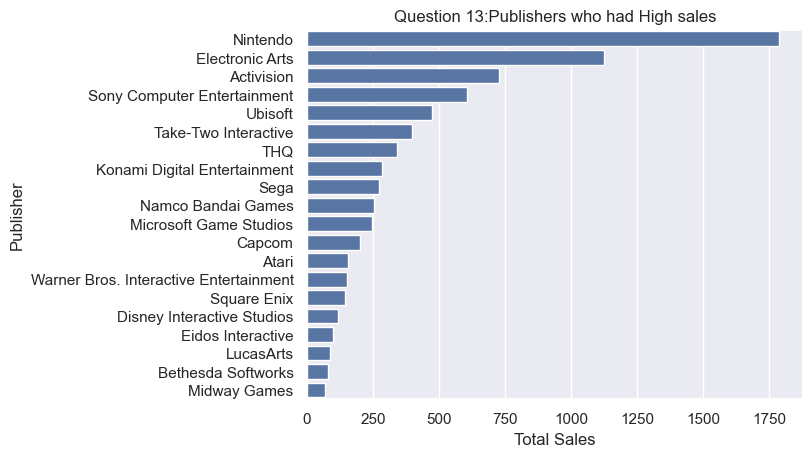

In [26]:
sns.set_theme(style="darkgrid")
sns.barplot(data=publishers,x="Global_Sales",y="Publisher")
plt.xlabel("Total Sales")
plt.ylabel("Publisher")
plt.title("Question 13:Publishers who had High sales")

In [37]:
top_games=sales.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(10).reset_index()

In [38]:
top_games

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


Text(0.5, 1.0, 'Question 14: Top 10 games sold globally')

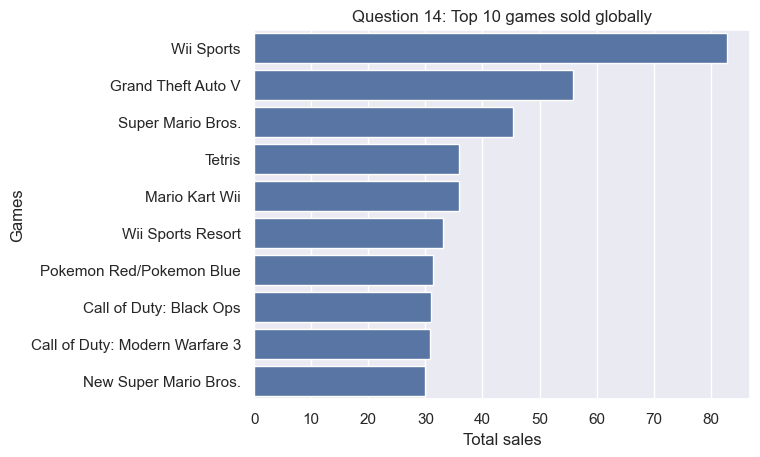

In [40]:
sns.barplot(data=top_games,x='Global_Sales',y='Name')
plt.xlabel("Total sales")
plt.ylabel("Games")
plt.title("Question 14: Top 10 games sold globally")

In [54]:
regional_sales = sales.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().reset_index()
regional_sales.head()


,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.87,58.52,97.35,12.63
3,DC,5.43,1.69,8.56,0.27
4,DS,390.71,194.65,175.57,60.53


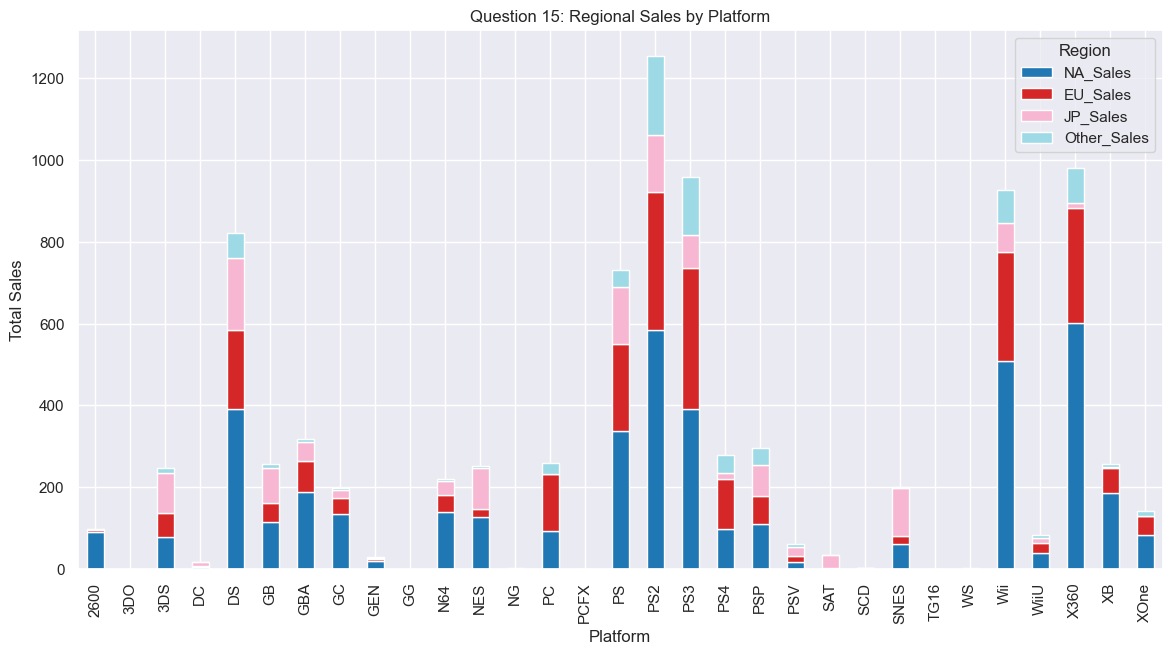

In [60]:
regional_sales.set_index("Platform").plot(
    kind="bar", 
    stacked=True, 
    figsize=(14,7),
    colormap="tab20"
)

plt.title("Question 15: Regional Sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.show()


In [61]:
sales_platform_year = (
    sales.groupby(["Year", "Platform"])["Global_Sales"]
      .sum()
      .reset_index()
)


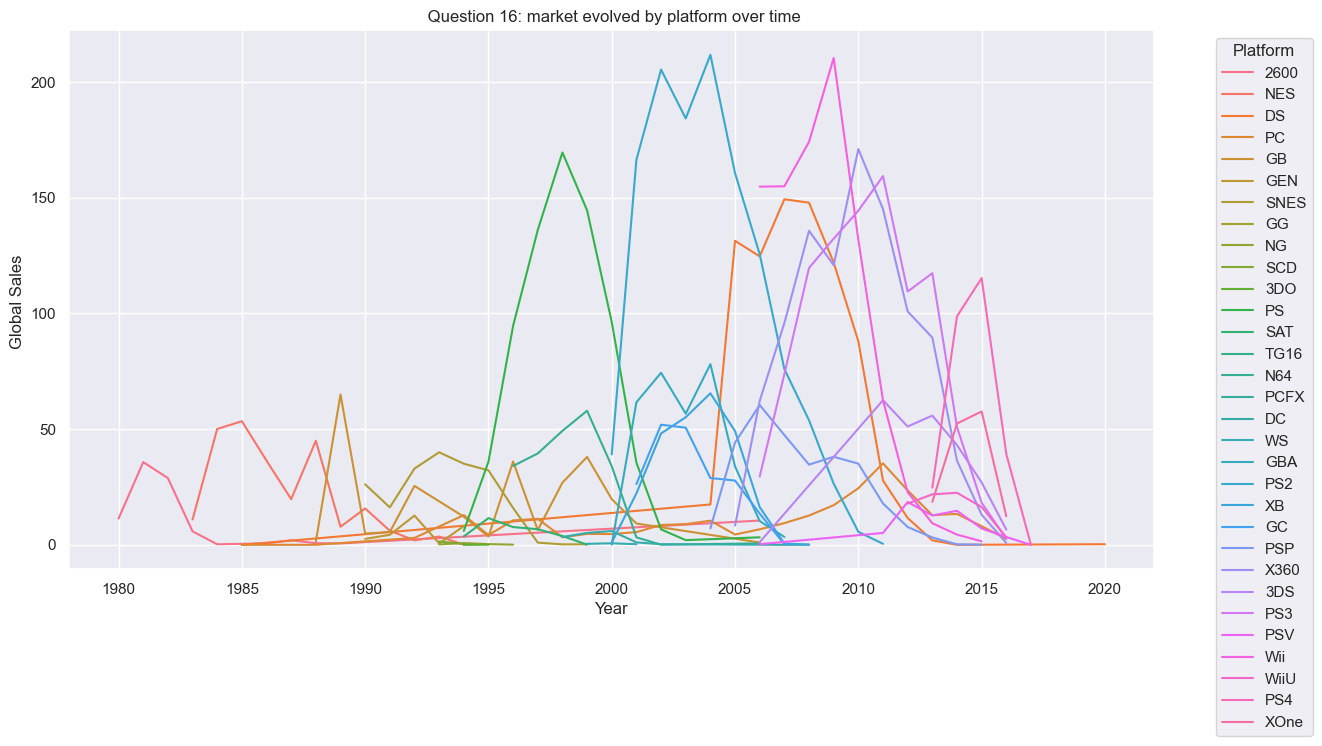

In [73]:
plt.figure(figsize=(14,7))
sns.lineplot(data=sales_platform_year, x="Year", y="Global_Sales" ,markers='o',hue="Platform")

plt.title("Global Sales Trend by Platform Over Time")
plt.xlabel("Year")
plt.ylabel("Global Sales ")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(" Question 16: market evolved by platform over time")
plt.show()

In [74]:
regional_genres = (
    sales.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
      .sum()
      .reset_index()
)
regional_genres.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,877.83,525.00,159.95,187.38
1,Adventure,105.80,64.13,52.07,16.81
2,Fighting,223.59,101.32,87.35,36.68
3,Misc,410.24,215.98,107.76,75.32
4,Platform,447.05,201.63,130.77,51.59


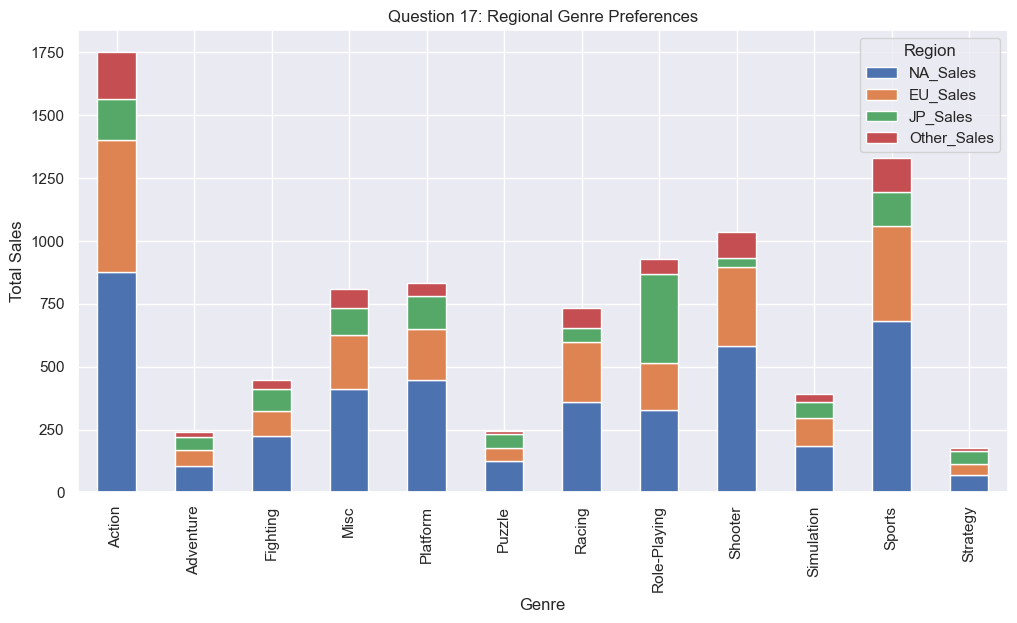

In [77]:
regional_genres.set_index("Genre").plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
)

plt.title("Question 17: Regional Genre Preferences")
plt.ylabel("Total Sales")
plt.xlabel("Genre")
plt.legend(title="Region")
plt.show()


In [ ]:
yearly_sales = (
    sales.groupby("Year")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]] .sum().reset_index()
)
yearly_sales.head()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,10.59,0.67,0.00,0.12,11.38
1,1981,33.40,1.96,0.00,0.32,35.77
2,1982,26.92,1.65,0.00,0.31,28.86
3,1983,7.76,0.80,8.10,0.14,16.79
4,1984,33.28,2.10,14.27,0.70,50.36


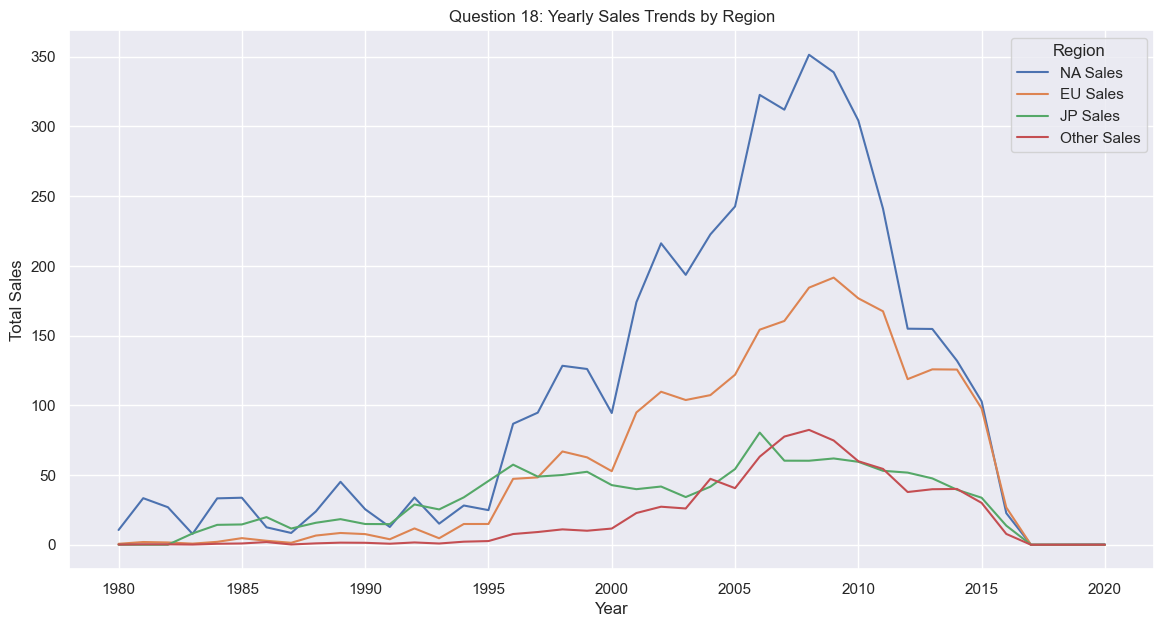

In [83]:


plt.figure(figsize=(14,7))
for region in ["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]:
    sns.lineplot(data=yearly_sales, x="Year", y=region, label=region.replace("_"," "),markers='o')

plt.title("Question 18: Yearly Sales Trends by Region")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.show()


In [93]:
top_publisher=sales.groupby("Publisher")["Global_Sales"].mean().sort_values(ascending=False).head(10).reset_index()

In [94]:
top_publisher

,Publisher,Global_Sales
0,Palcom,4.170000
1,Red Orb,2.620000
2,Nintendo,2.541337
3,Arena Entertainment,2.360000
4,UEP Systems,2.250000
5,RedOctane,2.170000
6,Valve,1.740000
7,Hello Games,1.600000
8,Sony Computer Entertainment Europe,1.592667
9,Westwood Studios,1.550000


Text(0.5, 1.0, 'Question 19: average sales per publisher')

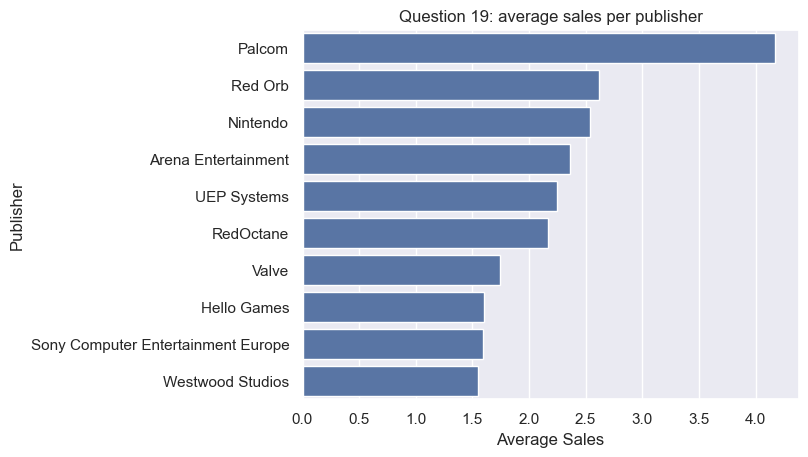

In [116]:
sns.barplot(data=top_publisher,x="Global_Sales",y="Publisher")
plt.xlabel("Average Sales")
plt.ylabel("Publisher")
plt.title("Question 19: average sales per publisher")

In [137]:
top5_per_platform = (
    sales.groupby("Platform")
      .apply(lambda x: x.nlargest(5, "Global_Sales"))
      .reset_index(drop=True)
)



C:\Users\Dell\AppData\Local\Temp\ipykernel_2076\3238788187.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, "Global_Sales"))


In [138]:
platform = "XOne"
subset = sales[sales["Platform"] == platform].head(5)



C:\Users\Dell\AppData\Local\Temp\ipykernel_2076\3956232604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Global_Sales", y="Name", palette="viridis")


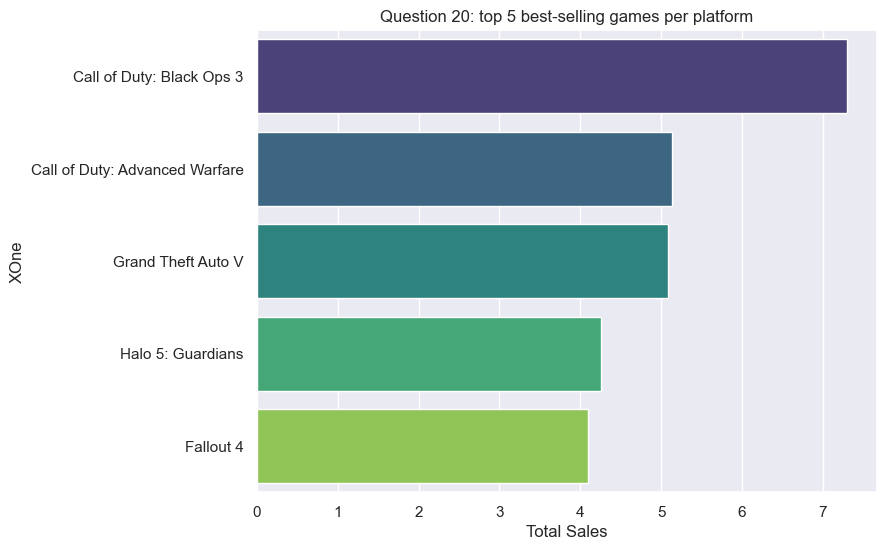

In [139]:
plt.figure(figsize=(8,6))
sns.barplot(data=subset, x="Global_Sales", y="Name", palette="viridis")
plt.xlabel("Total Sales")
plt.ylabel(platform)
plt.title("Question 20: top 5 best-selling games per platform")
plt.show()